<a href="https://colab.research.google.com/github/va1shnu/Capstone-project-EDA-with-Python/blob/main/Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Playstore_data Exploratory data analysis**
To Do:


1.   Talk about EDA
2.   Talk about Dataset (source, what it contains, how it will be useful)

        *   Kaggle
        *   Information about apps available in playstore
        *   Can be used to find ways to make apps more profitable, successful and appealing.







## Data preperation and cleaning


1.   Load the file using pandas
2.   Undersatand the info about the data and columns
3.   Fix any mistake or incorrect values, remove, NaN values and duplicate data

In [83]:
# Importing all the necessary libaries for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Display the plot inline in the output cell of the notebook.
%matplotlib inline

In [84]:
# Path to Playstore anlysis dataset and user reviews dataset.
playstore_data_path =\
(r'/content/drive/MyDrive/Almabetter/datasets/Play Store Data.csv')
user_reviews_data_path =\
(r'/content/drive/MyDrive/Almabetter/datasets/User Reviews.csv')

# Load the file using pandas.
playstore_df = pd.read_csv(playstore_data_path)
user_reviews_df = pd.read_csv(user_reviews_data_path)

In [85]:
# Getting an overview of the dataset.
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [86]:
# Inspecting the dataset and getting a sense of its structure, column names,
# and values.
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**From the Info and the first five rows of the dataset we can derive the following findings.**
1.   There are 10841 rows and 13 columns in the dataset. 

2.   Rating, Current Ver, Android Ver, Type and Content Rating all have null values in it. We should further analyse the misssing values and decide weather to drop them, impute values or keep them in our analysis. Whatever, actions are taken should also be justified.

1.   Columns namely reviews, size, price, installs have numerical values in them but their datatype in the playstore_dataset is of object dtype so, converting them to numerical dtypes before analysing the summary statistics is necessary.

2.   Its possible that the dataset may contain duplicate values. The rows with duplicate values must be studied seperately.





### **Converting columns to appropriate dtype for analysis**.

#### **Converting dtype of Review column from Object to Integer**

In [87]:
# Count the number of missing values in each column
null_counts = playstore_df.isna().sum().sort_values(ascending=False)
print(f'Count of null values in the given dataset are: \n\
{null_counts}')

# Calculate the percentage of missing values for each column 
percent_null_counts = null_counts/len(playstore_df)

# Omitting columns with zero null values
percent_null_counts = percent_null_counts[percent_null_counts != 0]
print(f'\nThe percentage of null values in the given dataset are: \n\
{percent_null_counts}')


Count of null values in the given dataset are: 
Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

The percentage of null values in the given dataset are: 
Rating            0.135965
Current Ver       0.000738
Android Ver       0.000277
Type              0.000092
Content Rating    0.000092
dtype: float64


Text(0.5, 1.0, 'Percentage of null values in dataset')

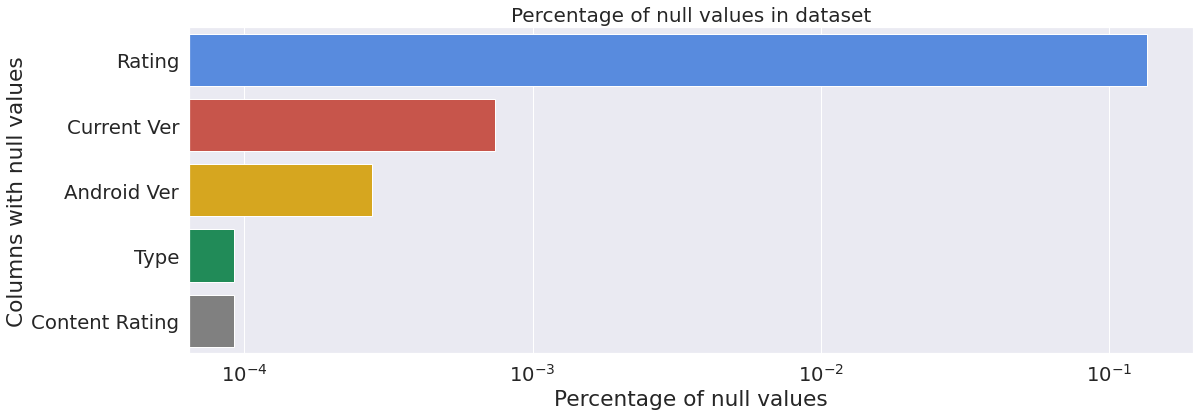

In [88]:
# Define the Google brand colors
google_colors = ["#4285F4", "#DB4437", "#F4B400", "#0F9D58", "#808080"]

# Set the default figure size for all charts
plt.rcParams["figure.figsize"] = (18, 6)

# Plot the bar chart with a logarithmic scale
sns.barplot(x=percent_null_counts.values, y=percent_null_counts.index,
            palette=google_colors)

# Set the x-axis scale to logarithmic
plt.xscale('log')

# Set the x-axis and y-axis labels and title
sns.set(font_scale = 1.8)
plt.xlabel("Percentage of null values")
plt.ylabel("Columns with null values")
plt.title("Percentage of null values in dataset", fontsize=20)


**From the analysis of the abovechart and data associated with it we can derive the following findings.**


1.   The column "Rating" contains the largest proportion of NaN values, around 13%. Dropping these rows would result in significant data loss, which could potentially reduce the accuracy of the analysis. Instead of dropping the rows, a better approach could be to impute the missing values using an aggregate metric, such as the mean or median, of the remaining values in the "Rating" column.

2.   The other columns (Current Ver, Android Ver, Type, and Content Rating) all have a much lower percentage of null values, with values ranging from 0.0092% to 0.0738%.The low percentage of null values in the other columns suggests that the data is generally complete and may be suitable for analysis



### **Handling the NaN values in the Play store data**

#### 1. Analysing the NaN values in rating column.




In [89]:
# Rows containing NaN values in the Rating column
rating_null = playstore_df[playstore_df['Rating'].isnull()]
rating_null

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


**Findings.**


1.   Congruent with previous analysis the Rating column contains 1470 NaN values. Also,other columns in these rows have valuable data in it which means  It is not practical to drop these rows or colummns so, we will impute them with mean, median or mode.




**Guidelines followed**

Since the vaues in rating column are independant on values in  other column we can consider the missingness as random hence, imputation is justified.

1.  Mean imputation: Use mean imputation for numerical data that follows a normal distribution. Mean imputation replaces missing values with the average value of the known values. However, it should be used with caution because it can affect the distribution of the data and potentially bias any analysis.

2. Median imputation: Use median imputation for numerical data that is skewed or contains outliers. Median imputation replaces missing values with the middle value of the known values. It is less sensitive to outliers and can better represent the central tendency of the data.


3. Mode imputation: Use mode imputation for categorical data. Mode imputation replaces missing values with the most common value in the known values. It is appropriate when dealing with nominal or ordinal data, such as gender or education level.

 **Since the values in rating column are not categorical we will not use mode imputatation**







##### **Checking median as a candidate for imputation.**

<ipython-input-90-fe0292b8dddd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(playstore_df['Rating'],color="#DB4437", ax=ax[0])


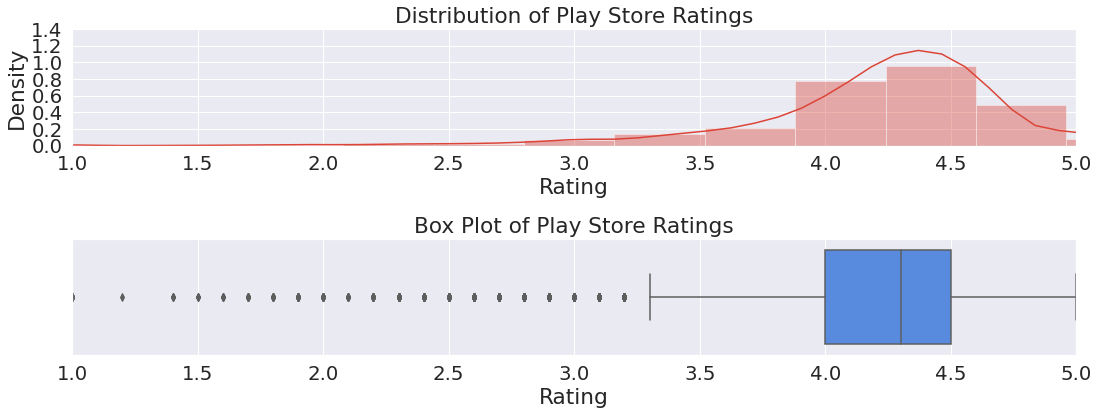

In [90]:
# Define figure size and color palette
sns.set_palette("Set2")
fig, ax = plt.subplots(2,1)

# Plot distribution and box plot
sns.distplot(playstore_df['Rating'],color="#DB4437", ax=ax[0])
sns.boxplot(x='Rating', data=playstore_df,color= "#4285F4", ax=ax[1])

# Set x and y scale
ax[0].set_xlim([1, 5])
ax[0].set_ylim([0, 1.4])
ax[1].set_xlim([1, 5])

# Set y-axis tick marks
ax[0].yaxis.set_major_locator(MultipleLocator(0.2))

# Set axis labels and titles
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Density')
ax[0].set_title('Distribution of Play Store Ratings')

ax[1].set_xlabel('Rating')
ax[1].set_ylabel('')
ax[1].set_title('Box Plot of Play Store Ratings')

# Add space between the two plots
fig.subplots_adjust(hspace=0.8)

# Show plot
plt.show()

In [91]:
mean_rating = round(playstore_df[~playstore_df['Rating'].isnull()]['Rating'].mean(),4)

median_rating = playstore_df[~playstore_df['Rating'].isnull()]['Rating'].median()

[mean_rating , median_rating]

[4.1933, 4.3]

## Exploratory analysis and visualisation

## Ask and answer questions

## Summary and conclusion